In [1]:
print('Hello World!') # Python 3
print 'Hello World!' # Python 2

Hello World!
Hello World!


In [2]:
# import packages
import pandas as pd
import numpy as np

C:\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
git_dir = 'C:/workspace/GWU_data_mining/01_basic_data_prep/src/notebooks/py' 

In [4]:
n_rows = 1000
n_vars = 2

In [5]:
# list comprehensions
num_col_names = ['numeric' + str(i+1) for i in range(0, n_vars)] 
num_col_names

['numeric1', 'numeric2']

In [6]:
type(num_col_names)

list

In [7]:
# lamba/anonymous functions
char_col_names = map(lambda j: 'char' + str(j+1), range(0, n_vars)) 
char_col_names

['char1', 'char2']

In [8]:
import string
print(string.ascii_uppercase)

# indexed from 0, unlike SAS or R
text_draw = [(letter * 8) for letter in string.ascii_uppercase[:7]] 
text_draw

ABCDEFGHIJKLMNOPQRSTUVWXYZ


['AAAAAAAA',
 'BBBBBBBB',
 'CCCCCCCC',
 'DDDDDDDD',
 'EEEEEEEE',
 'FFFFFFFF',
 'GGGGGGGG']

In [9]:
randoms = np.random.randn(n_rows, n_vars)
randoms[0:5]

array([[-0.94103561,  0.65507958],
       [ 1.40624331,  1.89611515],
       [-0.35367377,  0.49060879],
       [ 0.35743656,  0.48037553],
       [-1.57990726,  0.90781204]])

In [10]:
type(randoms)

numpy.ndarray

In [11]:
# key is redundant/unnecessary
num_cols = pd.DataFrame(randoms, columns=num_col_names)
num_cols.head()

,numeric1,numeric2
0,-0.941036,0.655080
1,1.406243,1.896115
2,-0.353674,0.490609
3,0.357437,0.480376
4,-1.579907,0.907812


In [12]:
type(num_cols)

pandas.core.frame.DataFrame

In [13]:
char_cols = pd.DataFrame(np.random.choice(text_draw, (n_rows, n_vars)), 
                         columns=char_col_names)
char_cols.head()

,char1,char2
0,AAAAAAAA,EEEEEEEE
1,EEEEEEEE,AAAAAAAA
2,CCCCCCCC,FFFFFFFF
3,AAAAAAAA,GGGGGGGG
4,CCCCCCCC,FFFFFFFF


In [14]:
scratch_df = pd.concat([num_cols, char_cols], axis=1)
scratch_df.head()

,numeric1,numeric2,char1,char2
0,-0.941036,0.655080,AAAAAAAA,EEEEEEEE
1,1.406243,1.896115,EEEEEEEE,AAAAAAAA
2,-0.353674,0.490609,CCCCCCCC,FFFFFFFF
3,0.357437,0.480376,AAAAAAAA,GGGGGGGG
4,-1.579907,0.907812,CCCCCCCC,FFFFFFFF


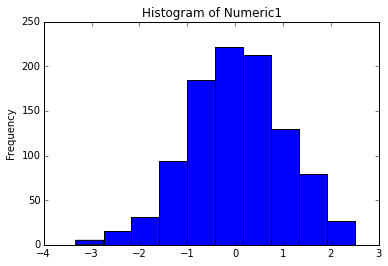

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
# slice by index
scratch_df.ix[:, 0].plot.hist(title='Histogram of Numeric1')

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


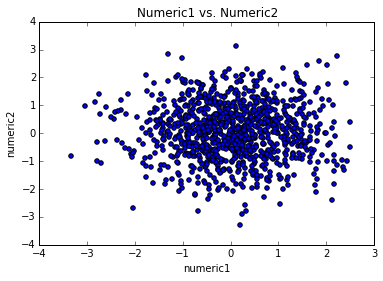

In [16]:
plt.figure()
scratch_df.plot.scatter(x='numeric1', y='numeric2',
                        title='Numeric1 vs. Numeric2')

***
## Subsetting Pandas dataframes
### By columns

In [17]:
# locating by index
# one column returns a sequence
scratch_df.iloc[:, 0].head()

0   -0.941036
1    1.406243
2   -0.353674
3    0.357437
4   -1.579907
Name: numeric1, dtype: float64

In [18]:
type(scratch_df.iloc[:, 0])

pandas.core.series.Series

In [19]:
# more than one columns makes a dataframe
scratch_df.iloc[:, 0:2].head()

,numeric1,numeric2
0,-0.941036,0.655080
1,1.406243,1.896115
2,-0.353674,0.490609
3,0.357437,0.480376
4,-1.579907,0.907812


In [20]:
type(scratch_df.iloc[:, 0:2])

pandas.core.frame.DataFrame

In [21]:
# getting by name
scratch_df['numeric1'].head()

0   -0.941036
1    1.406243
2   -0.353674
3    0.357437
4   -1.579907
Name: numeric1, dtype: float64

In [22]:
scratch_df.numeric1.head()

0   -0.941036
1    1.406243
2   -0.353674
3    0.357437
4   -1.579907
Name: numeric1, dtype: float64

In [23]:
# locating by label
scratch_df.loc[:, 'numeric1'].head()

0   -0.941036
1    1.406243
2   -0.353674
3    0.357437
4   -1.579907
Name: numeric1, dtype: float64

In [24]:
scratch_df.loc[:, ['numeric1', 'numeric2']].head()

,numeric1,numeric2
0,-0.941036,0.655080
1,1.406243,1.896115
2,-0.353674,0.490609
3,0.357437,0.480376
4,-1.579907,0.907812


### By rows

In [25]:
# Getting rows
scratch_df[0:3]

,numeric1,numeric2,char1,char2
0,-0.941036,0.655080,AAAAAAAA,EEEEEEEE
1,1.406243,1.896115,EEEEEEEE,AAAAAAAA
2,-0.353674,0.490609,CCCCCCCC,FFFFFFFF


In [26]:
# Selecting by index or location
scratch_df.iloc[0:5, :]

,numeric1,numeric2,char1,char2
0,-0.941036,0.655080,AAAAAAAA,EEEEEEEE
1,1.406243,1.896115,EEEEEEEE,AAAAAAAA
2,-0.353674,0.490609,CCCCCCCC,FFFFFFFF
3,0.357437,0.480376,AAAAAAAA,GGGGGGGG
4,-1.579907,0.907812,CCCCCCCC,FFFFFFFF


In [27]:
scratch_df.loc[0:5, :]

,numeric1,numeric2,char1,char2
0,-0.941036,0.655080,AAAAAAAA,EEEEEEEE
1,1.406243,1.896115,EEEEEEEE,AAAAAAAA
2,-0.353674,0.490609,CCCCCCCC,FFFFFFFF
3,0.357437,0.480376,AAAAAAAA,GGGGGGGG
4,-1.579907,0.907812,CCCCCCCC,FFFFFFFF
5,-0.345244,1.244428,GGGGGGGG,EEEEEEEE


In [28]:
# Boolean subsetting
scratch_df[scratch_df.numeric2 > 0].head()

,numeric1,numeric2,char1,char2
0,-0.941036,0.655080,AAAAAAAA,EEEEEEEE
1,1.406243,1.896115,EEEEEEEE,AAAAAAAA
2,-0.353674,0.490609,CCCCCCCC,FFFFFFFF
3,0.357437,0.480376,AAAAAAAA,GGGGGGGG
4,-1.579907,0.907812,CCCCCCCC,FFFFFFFF


In [29]:
scratch_df[scratch_df.char1 == 'AAAAAAAA'].head()

,numeric1,numeric2,char1,char2
0,-0.941036,0.655080,AAAAAAAA,EEEEEEEE
3,0.357437,0.480376,AAAAAAAA,GGGGGGGG
22,1.582439,0.557680,AAAAAAAA,CCCCCCCC
25,1.140907,-1.058162,AAAAAAAA,EEEEEEEE
27,0.212491,-0.358633,AAAAAAAA,BBBBBBBB


In [30]:
scratch_df[scratch_df.char1.isin(['AAAAAAAA', 'BBBBBBBB'])].head()

,numeric1,numeric2,char1,char2
0,-0.941036,0.655080,AAAAAAAA,EEEEEEEE
3,0.357437,0.480376,AAAAAAAA,GGGGGGGG
15,0.783068,-0.617605,BBBBBBBB,FFFFFFFF
17,-1.381647,-0.095760,BBBBBBBB,GGGGGGGG
18,-0.429108,0.408519,BBBBBBBB,CCCCCCCC


In [31]:
scratch_df[scratch_df.numeric2 > 0].loc[5:10, 'char2']

5     EEEEEEEE
10    GGGGGGGG
Name: char2, dtype: object

## Updating the dataframe

In [32]:
# must use .copy or this will be a symbolic link
scratch_df2 = scratch_df.copy()
scratch_df2.loc[500:, 'char1'] = 'ZZZZZZZZ'
scratch_df2.tail()

,numeric1,numeric2,char1,char2
995,-1.257504,0.248883,ZZZZZZZZ,EEEEEEEE
996,0.742574,-1.107184,ZZZZZZZZ,CCCCCCCC
997,-0.951870,0.976669,ZZZZZZZZ,BBBBBBBB
998,-0.194857,-0.934801,ZZZZZZZZ,DDDDDDDD
999,-0.137090,-0.085341,ZZZZZZZZ,EEEEEEEE


In [33]:
scratch_df2.iat[0, 0] = 1000
scratch_df2.head()

,numeric1,numeric2,char1,char2
0,1000.000000,0.655080,AAAAAAAA,EEEEEEEE
1,1.406243,1.896115,EEEEEEEE,AAAAAAAA
2,-0.353674,0.490609,CCCCCCCC,FFFFFFFF
3,0.357437,0.480376,AAAAAAAA,GGGGGGGG
4,-1.579907,0.907812,CCCCCCCC,FFFFFFFF


## Sorting the dataframe

In [34]:
scratch_df2.sort_values(by='char1').head()

,numeric1,numeric2,char1,char2
0,1000.000000,0.655080,AAAAAAAA,EEEEEEEE
431,-0.601689,-0.009165,AAAAAAAA,AAAAAAAA
477,0.104109,-0.556033,AAAAAAAA,EEEEEEEE
78,2.036526,-0.430645,AAAAAAAA,GGGGGGGG
233,-0.282834,0.335629,AAAAAAAA,BBBBBBBB


In [35]:
scratch_df3 = scratch_df2.sort_values(by=['char1', 'numeric1'],
                            ascending=[False, True]).copy()
scratch_df3.head()

,numeric1,numeric2,char1,char2
956,-3.334630,-0.810400,ZZZZZZZZ,AAAAAAAA
988,-3.050137,0.985998,ZZZZZZZZ,GGGGGGGG
984,-2.796305,-0.317625,ZZZZZZZZ,EEEEEEEE
856,-2.742588,1.411098,ZZZZZZZZ,BBBBBBBB
737,-2.711064,-1.081197,ZZZZZZZZ,GGGGGGGG


In [46]:
scratch_df2.sort_index().head()

,numeric1,numeric2,char1,char2
0,1000.000000,-1.586930,GGGGGGGG,DDDDDDDD
1,0.751625,-1.489012,DDDDDDDD,FFFFFFFF
2,-1.190265,-1.896591,DDDDDDDD,EEEEEEEE
3,-0.332392,0.584192,CCCCCCCC,EEEEEEEE
4,-0.482733,0.422166,DDDDDDDD,GGGGGGGG


## Adding data to the dataframe

In [36]:
# concat
scratch_df3 = scratch_df3.drop(['numeric1', 'numeric2'] , axis=1)
scratch_df3.columns = ['char3', 'char4']
scratch_df3.tail()

,char3,char4
78,AAAAAAAA,GGGGGGGG
176,AAAAAAAA,BBBBBBBB
250,AAAAAAAA,GGGGGGGG
306,AAAAAAAA,CCCCCCCC
0,AAAAAAAA,EEEEEEEE


In [39]:
# default outer join on matching indices
scratch_df4 = pd.concat([scratch_df, scratch_df3])
scratch_df4

,char1,char2,char3,char4,numeric1,numeric2
0,AAAAAAAA,EEEEEEEE,NaN,NaN,-0.941036,0.655080
1,EEEEEEEE,AAAAAAAA,NaN,NaN,1.406243,1.896115
2,CCCCCCCC,FFFFFFFF,NaN,NaN,-0.353674,0.490609
3,AAAAAAAA,GGGGGGGG,NaN,NaN,0.357437,0.480376
4,CCCCCCCC,FFFFFFFF,NaN,NaN,-1.579907,0.907812
5,GGGGGGGG,EEEEEEEE,NaN,NaN,-0.345244,1.244428
6,DDDDDDDD,GGGGGGGG,NaN,NaN,0.764935,-1.982000
7,GGGGGGGG,CCCCCCCC,NaN,NaN,0.320298,-0.236166
8,CCCCCCCC,AAAAAAAA,NaN,NaN,-0.429464,-1.510330
9,EEEEEEEE,AAAAAAAA,NaN,NaN,1.662562,-1.031286


In [40]:
# outer join on matching columns
scratch_df5 = pd.concat([scratch_df, scratch_df3], axis=1)
scratch_df5.head()

# merge allows for SQL-like syntax, i.e. merge(left, right, on=)

,numeric1,numeric2,char1,char2,char3,char4
0,-0.941036,0.655080,AAAAAAAA,EEEEEEEE,AAAAAAAA,EEEEEEEE
1,1.406243,1.896115,EEEEEEEE,AAAAAAAA,EEEEEEEE,AAAAAAAA
2,-0.353674,0.490609,CCCCCCCC,FFFFFFFF,CCCCCCCC,FFFFFFFF
3,0.357437,0.480376,AAAAAAAA,GGGGGGGG,AAAAAAAA,GGGGGGGG
4,-1.579907,0.907812,CCCCCCCC,FFFFFFFF,CCCCCCCC,FFFFFFFF


In [58]:
scratch_df5.shape

(1000, 6)

In [57]:
# append
scratch_df6 = scratch_df.append(scratch_df)
scratch_df6.shape

(2000, 4)

## Comparing dataframes

In [60]:
scratch_df.equals(scratch_df)

True

In [61]:
scratch_df.equals(scratch_df2)

False

## Summarizing dataframes

In [62]:
scratch_df.mean()

numeric1    0.036305
numeric2    0.058137
dtype: float64

In [63]:
scratch_df.mode()

,numeric1,numeric2,char1,char2
0,NaN,NaN,CCCCCCCC,CCCCCCCC


In [64]:
scratch_df.describe()

,numeric1,numeric2
count,1000.000000,1000.000000
mean,0.036305,0.058137
std,1.000527,1.009897
min,-3.334630,-3.281950
25%,-0.639339,-0.623036
50%,0.060097,0.043032
75%,0.710305,0.733476
max,2.500826,3.111069


## By group processing

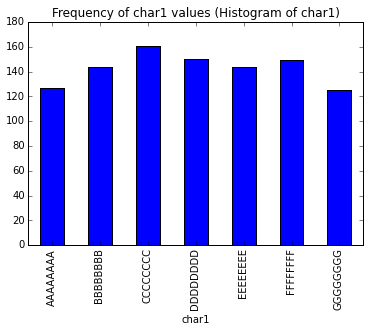

In [65]:
counts = scratch_df.groupby('char1').size()
plt.figure()
counts.plot.bar(title='Frequency of char1 values (Histogram of char1)')

In [68]:
group_means = scratch_df.groupby(['char1', 'char2']).mean()
group_means

numeric1  numeric2
char1    char2                       
AAAAAAAA AAAAAAAA  0.131237  0.077281
         BBBBBBBB  0.103321 -0.115626
         CCCCCCCC  0.203059  0.351764
         DDDDDDDD  0.064047 -0.219687
         EEEEEEEE -0.055882  0.531112
         FFFFFFFF  0.035156 -0.067736
         GGGGGGGG  0.304449 -0.283951
BBBBBBBB AAAAAAAA  0.576439 -0.359889
         BBBBBBBB  0.044088  0.197240
         CCCCCCCC  0.183643  0.207450
         DDDDDDDD  0.140064  0.149453
         EEEEEEEE -0.141100 -0.592167
         FFFFFFFF  0.161037  0.469685
         GGGGGGGG -0.441764  0.075679
CCCCCCCC AAAAAAAA -0.001746 -0.173593
         BBBBBBBB  0.180917  0.189700
         CCCCCCCC -0.011210 -0.025035
         DDDDDDDD  0.340233  0.028792
         EEEEEEEE -0.080343  0.036323
         FFFFFFFF -0.001431  0.384437
         GGGGGGGG  0.003324  0.301643
DDDDDDDD AAAAAAAA  0.400599  0.223407
         BBBBBBBB  0.018194  0.533846
         CCCCCCCC -0.388888 -0.159406
         DDDDDDDD  0.042227  0.310765
         EEEEEEEE  0.174632 -0.171190
         FFFFFFFF  0.238697 -0.145164
         GGGGGGGG -0.274355  0.248157
EEEEEEEE AAAAAAAA  0.107358  0.115311
         BBBBBBBB  0.333053  0.175339
         CCCCCCCC  0.031395 -0.485526
         DDDDDDDD  0.090607 -0.023565
         EEEEEEEE -0.017337  0.175600
         FFFFFFFF -0.155765 -0.010743
         GGGGGGGG  0.015821  0.127790
FFFFFFFF AAAAAAAA  0.373699  0.393822
         BBBBBBBB -0.057404 -0.118500
         CCCCCCCC -0.297210 -0.017520
         DDDDDDDD  0.045028  0.244693
         EEEEEEEE  0.289427  0.020835
         FFFFFFFF -0.005710 -0.009111
         GGGGGGGG -0.112728 -0.003894
GGGGGGGG AAAAAAAA  0.243146  0.160814
         BBBBBBBB -0.274112  0.131445
         CCCCCCCC  0.219385  0.235164
         DDDDDDDD -0.155124 -0.130059
         EEEEEEEE -0.173920  0.292663
         FFFFFFFF -0.034019 -0.409699
         GGGGGGGG -0.092745 -0.030816

***
## . Transposing a table
* Transposing a matrix simply switches row and columns values
* Transposing a data.frame or dplyr table is more complex because of metadata associated with variable names and row indices

In [70]:
# .T
scratch_df.T.iloc[:, 0:5]

,0,1,2,3,4
numeric1,-0.941036,1.40624,-0.353674,0.357437,-1.57991
numeric2,0.65508,1.89612,0.490609,0.480376,0.907812
char1,AAAAAAAA,EEEEEEEE,CCCCCCCC,AAAAAAAA,CCCCCCCC
char2,EEEEEEEE,AAAAAAAA,FFFFFFFF,GGGGGGGG,FFFFFFFF


Often, instead of simply transposing, a data set will need to be reformatted in a **melt/stack** - **column split** - **cast** action described in Hadley Wickham's *Tidy Data*:
https://www.jstatsoft.org/article/view/v059i10

See the `stack` and `unstack` methods for Pandas dataframes

## Exporting and importing a dataframe

In [74]:
# export, many to_* methods available for other formats
scratch_df.to_csv('scratch.csv')

In [75]:
# import , many read_* methods available for other formats
scratch_df7 = pd.read_csv('scratch.csv')